In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

['all_episodes_2000000.csv', 'all_episodes_500000.csv', 'all_episodes_8000000.csv']


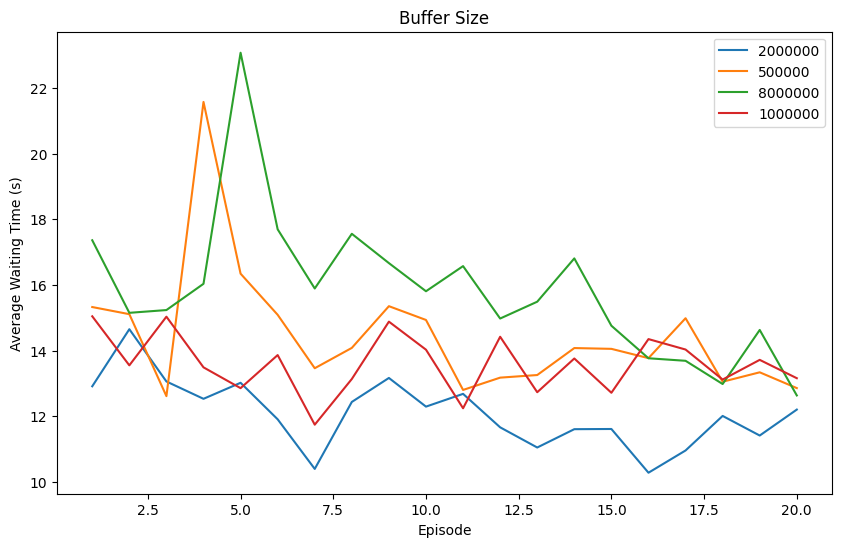

['all_episodes_1000.csv', 'all_episodes_1500.csv', 'all_episodes_2000.csv']


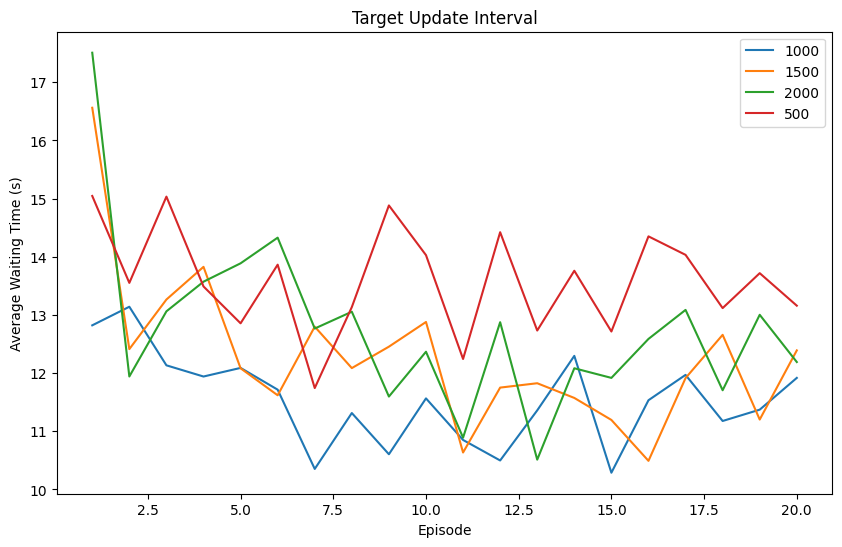

['all_episodes_avg_speed.csv', 'all_episodes_pressure.csv', 'all_episodes_queue.csv']


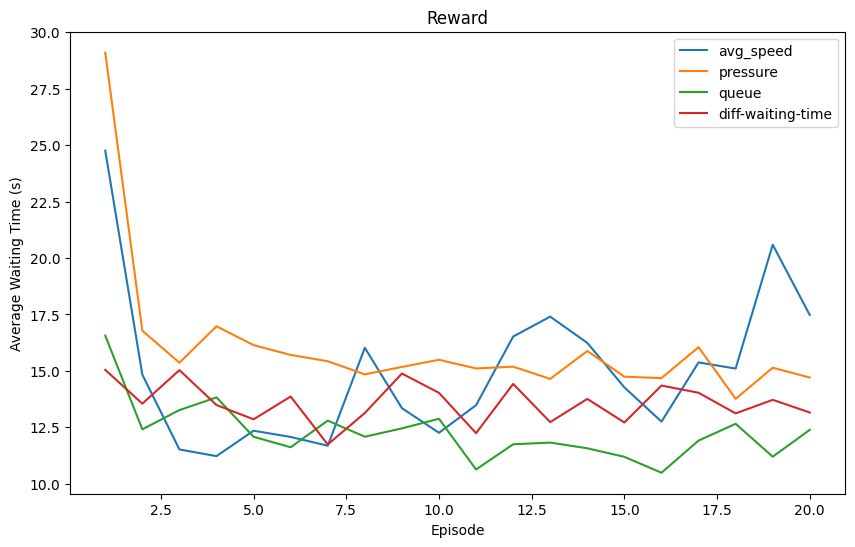

In [ ]:
# visualize the data after ablation study

# Directpries each contain the ouputus of training
directories = ['buffer_size', 'target_update_interval', 'reward']

# outputs of the original model
old_data = pd.read_csv("outputs - ablation/all_episodes_old.csv")

# plot the avg_wait_time vs episode for each of the hyperparameters chosen
for directory in directories: 
    folder_path = f"outputs - ablation/{directory}"
    # for each hyperparameter value plot the ocrresponding avg_wait_time per episode
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    print(csv_files)
    plt.figure(figsize=(10, 6))
    x = 'episode'
    y ='accumulated_avg_wait_times'
    for csv_file in csv_files:
        data = pd.read_csv(f'{folder_path}/{csv_file}')
        value = "_".join(csv_file.split('.')[0].split('_')[2:])
        plt.plot(data[x], data[y], label=value, linewidth=1.5)

    # plot the original values
    value = None
    if directory == 'buffer_size':
        value = 1000000 
    elif directory == 'target_update_interval':
        value = 500
    else:
        value = "diff-waiting-time"
    plt.plot(old_data[x], old_data[y], label=value, linewidth=1.5)

    title = " ".join([word.capitalize() for word in directory.split("_")])
    # Add titles and labels
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Average Waiting Time (s)')
    plt.legend()
    # Display the plot
    plt.savefig(f'average_waiting_time_plot_{directory}.png', dpi=300, bbox_inches='tight')
    plt.show()